In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
import sys
sys.path.append('/home/tomek/ib_tools')
from blotter import MongoBlotter
%matplotlib inline

In [2]:
cash = 71964.76
df = MongoBlotter().read()
df.tail(30)

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
1981,60881203c80db0d1a41a7638,2021-04-27 15:30:43.426,2021-04-27 13:30:43.422,MNQM1,SELL,3.0,14009.833333,"[0000e1a7.60876108.01.01, 0000e1a7.60876109.01...",27,1374187025,STOP-LOSS,1.56,-128.620000
1982,60881219c80db0d1a41a7639,2021-04-27 15:31:05.198,2021-04-27 13:31:05.194,NQM1,SELL,2.0,14006.750000,"[0000e1a7.6087617a.01.01, 0000e1a7.6087617b.01...",25,1374187023,STOP-LOSS,4.20,-978.400000
1983,6089648ac80db0d1a41a799a,2021-04-28 15:35:06.863,2021-04-28 13:35:06.859,MNQM1,SELL,2.0,13897.000000,"[0000e1a7.6088bba5.01.01, 0000e1a7.6088bba6.01...",18,1753802138,ENTRY,1.04,0.000000
1984,6089648ac80db0d1a41a799b,2021-04-28 15:35:06.953,2021-04-28 13:35:06.942,NQM1,SELL,2.0,13897.250000,"[0000e1a7.6088bba8.01.01, 0000e1a7.6088bba9.01...",17,1753802137,ENTRY,4.20,0.000000
1985,6089661ec80db0d1a41a79a2,2021-04-28 15:41:50.187,2021-04-28 13:41:50.182,NQM1,BUY,2.0,13912.000000,[0000e1a7.6088bff9.01.01],21,1753802141,STOP-LOSS,4.20,-598.400000
1986,6089661ec80db0d1a41a79a3,2021-04-28 15:41:50.188,2021-04-28 13:41:50.182,MNQM1,BUY,2.0,13912.000000,[0000e1a7.6088bffa.01.01],19,1753802139,STOP-LOSS,1.04,-62.080000
1987,60898392c80db0d1a41a79ec,2021-04-28 17:47:30.822,2021-04-28 15:47:30.807,NQM1,SELL,2.0,13892.500000,[0000e1a7.6088e7f3.01.01],23,1753802145,ENTRY,4.20,0.000000
1988,60898393c80db0d1a41a79ed,2021-04-28 17:47:31.082,2021-04-28 15:47:31.069,MNQM1,SELL,2.0,13892.750000,"[0000e1a7.6088e7f4.01.01, 0000e1a7.6088e7f5.01...",24,1753802148,ENTRY,1.04,0.000000
1989,60898888c80db0d1a41a79fa,2021-04-28 18:08:40.118,2021-04-28 16:08:40.114,NQM1,BUY,2.0,13905.000000,[0000e1a7.6088ef31.01.01],25,1753802149,STOP-LOSS,4.20,-508.400000
1990,60898888c80db0d1a41a79fb,2021-04-28 18:08:40.273,2021-04-28 16:08:40.226,MNQM1,BUY,2.0,13904.750000,[0000e1a7.6088ef32.01.01],27,1753802151,STOP-LOSS,1.04,-50.080000


In [3]:
df

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
0,5f0f0525bd2ee6b18fd4eeb2,2020-07-15 15:31:17.017,2020-07-15 13:31:17.007,MYM SEP 20,SELL,6.0,26855.000000,[0000e1a7.5f0f086b.01.01],1248,779987153,STOP-LOSS,2.82,1416.360000
1,5f0f0525bd2ee6b18fd4eeb3,2020-07-15 15:31:17.560,2020-07-15 13:31:17.559,YM SEP 20,SELL,1.0,26855.000000,[0000e1a7.5f0f086d.01.01],1247,779987152,STOP-LOSS,2.10,2370.800000
2,5f0f1613f81f3181af388633,2020-07-15 16:43:31.133,2020-07-15 14:43:31.088,NQU0,BUY,1.0,10749.000000,[0000e1a7.5f0f3a1f.01.01],1265,165612016,ENTRY,2.10,0.000000
3,5f0f1613f81f3181af388634,2020-07-15 16:43:31.139,2020-07-15 14:43:31.133,MNQU0,BUY,1.0,10748.750000,[0000e1a7.5f0f3a20.01.01],1266,165612017,ENTRY,0.47,0.000000
4,5f0f1923f81f3181af38863d,2020-07-15 16:56:35.084,2020-07-15 14:56:35.083,MNQU0,SELL,1.0,10717.500000,[0000e1a7.5f0f3fa0.01.01],1268,165612019,STOP-LOSS,0.47,-63.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,608ad717c80db0d1a41a7d65,2021-04-29 17:56:07.915,2021-04-29 15:56:07.912,MNQM1,SELL,9.0,13880.972222,"[0000e1a7.608a557d.01.01, 0000e1a7.608a557e.01...",123,777374449,ENTRY,4.68,0.000000
2007,608adefcc80db0d1a41a7d78,2021-04-29 18:29:48.838,2021-04-29 16:29:48.834,NQM1,BUY,1.0,13850.750000,[0000e1a7.608a628f.01.01],124,777374450,STOP-LOSS,2.10,685.800000
2008,608adefcc80db0d1a41a7d79,2021-04-29 18:29:48.951,2021-04-29 16:29:48.898,MNQM1,BUY,9.0,13861.444444,"[0000e1a7.608a6290.01.01, 0000e1a7.608a6291.01...",126,777374452,STOP-LOSS,4.68,342.139999
2009,608ae342c80db0d1a41a7d86,2021-04-29 18:48:02.235,2021-04-29 16:48:02.186,MYM JUN 21,BUY,1.0,33782.000000,[0000e1a7.608a66c2.01.01],120,777374442,STOP-LOSS,0.52,-37.040000


In [4]:
start_date = '20210117'

In [5]:
#del df['sys_time']
del df['exec_ids']
del df['perm_id']
del df['_id']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])
micro_contracts = df[df.contract.str.startswith('M')]
macro_contracts = df[~df.contract.str.startswith('M')]
micro_contracts['amount'] /= 10
df = pd.concat([macro_contracts, micro_contracts]).sort_index()
df.contract = df.contract.str.strip('M')
df['contract'] = df['contract'].apply(lambda x: x[:2])
df.contract = df.contract.str.strip()
df = df.loc[start_date:]

In [6]:
c = set(df['contract'])
allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
#allocs = pd.Series([1/3, 2/3, 1], index=['ES','NQ', 'total'])
#allocs = pd.Series([.4, .125, .225, .25, 1], index=['NQ','ES', 'GC', 'YM', 'total'])

In [7]:
df.tail(50)

,sys_time,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,,
2021-04-23 19:46:04.457,2021-04-23 21:46:04.463,NQ,SELL,0.2,13951.500000,19,STOP-LOSS,1.04,236.920000,104384.400013
2021-04-23 19:46:05.272,2021-04-23 21:46:05.289,NQ,SELL,2.0,13951.500000,21,STOP-LOSS,4.20,2311.600000,106696.000013
2021-04-26 13:37:36.951,2021-04-26 15:37:36.957,YM,BUY,0.2,34021.000000,18,ENTRY,1.04,0.000000,106696.000013
2021-04-26 13:37:37.015,2021-04-26 15:37:37.027,YM,BUY,3.0,34021.000000,17,ENTRY,6.30,0.000000,106696.000013
2021-04-26 14:51:35.961,2021-04-26 16:51:36.019,NQ,BUY,2.0,13977.000000,23,ENTRY,4.20,0.000000,106696.000013
2021-04-26 14:51:36.774,2021-04-26 16:51:36.785,NQ,BUY,0.3,13976.750000,24,ENTRY,1.56,0.000000,106696.000013
2021-04-26 16:08:01.974,2021-04-26 18:08:02.019,NQ,SELL,2.0,13962.000000,25,STOP-LOSS,4.20,-608.400000,106087.600013
2021-04-26 16:08:02.019,2021-04-26 18:08:02.021,NQ,SELL,0.3,13962.000000,27,STOP-LOSS,1.56,-91.620000,105995.980013
2021-04-26 18:02:01.763,2021-04-26 20:02:01.774,NQ,BUY,2.0,13999.250000,45,ENTRY,4.20,0.000000,105995.980013


In [8]:
allocs

YM       0.333333
ES       0.333333
NQ       0.333333
total    1.000000
dtype: float64

In [9]:
df.groupby('contract').realizedPNL.sum()

contract
ES    14098.330000
NQ     1824.740002
YM    10176.200001
Name: realizedPNL, dtype: float64

In [10]:
df.realizedPNL.sum()

26099.270002999998

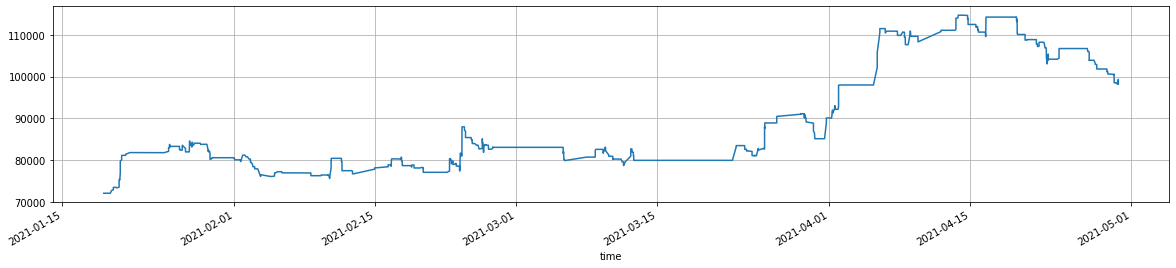

In [11]:
df.cash.plot(figsize=(20,4), grid=True);

In [12]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [13]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES     60
 NQ    573
 YM    113
 Name: action, dtype: int64,
 746)

In [14]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES    0.821918
 NQ    7.849315
 YM    1.547945
 Name: action, dtype: float64,
 10.219178082191782)

In [15]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES     164.32
NQ    1443.84
YM     359.50
Name: commission, dtype: float64

In [16]:
df.commission.sum()

1967.6599999999999

In [17]:
# per trade stats (pro rated per macro contract)
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss', 
                                'win_ratio', 'EV/contract', 'number_of_contracts'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    d['pnl_per_contract'] = d.realizedPNL / d.amount
    row['average_PNL'] = round(d['pnl_per_contract'].mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0])['pnl_per_contract'].mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0])['pnl_per_contract'].mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV/contract'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_contracts'] = d.amount.sum()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV/contract,number_of_contracts
NQ,0.38,30.58,856.71,-475.30,1.80,30.86,240.0
ES,0.52,332.89,1626.37,-1052.99,1.54,340.28,28.3
YM,0.48,149.25,842.97,-496.63,1.70,146.38,69.5
total,0.41,72.01,930.71,-514.70,1.81,77.92,337.8


In [18]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [19]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,NQ,YM,total
ES,1.000000,0.275655,-0.131317,0.636242
NQ,0.275655,1.000000,-0.228952,0.742216
YM,-0.131317,-0.228952,1.000000,0.278809
total,0.636242,0.742216,0.278809,1.000000


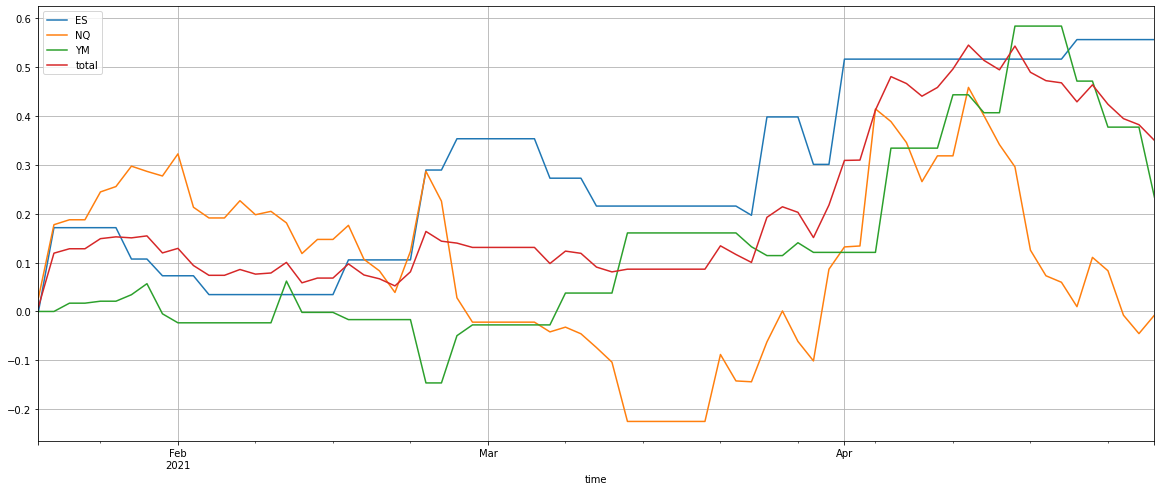

In [20]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

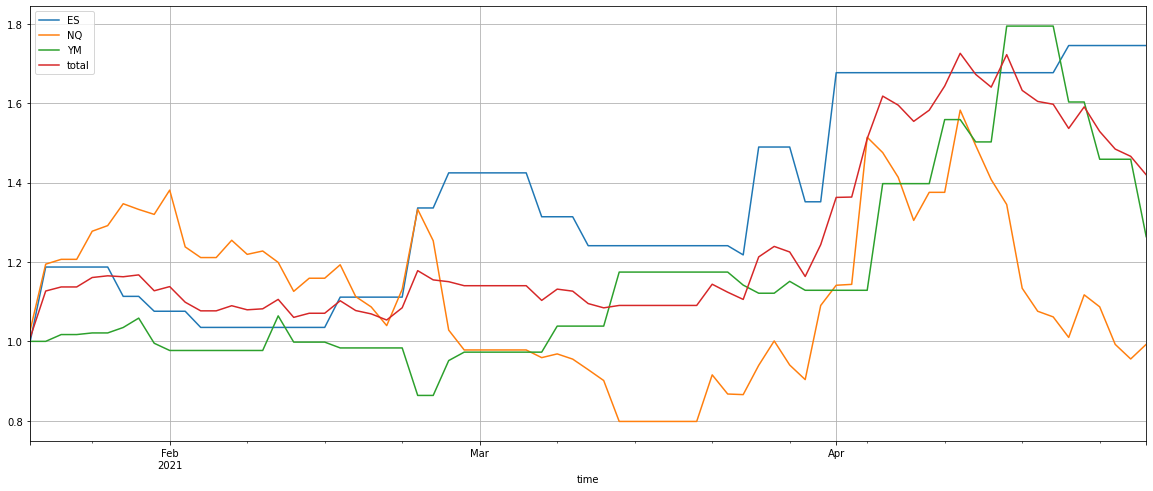

In [21]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [22]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,NQ,YM,total
Annual return,5.834661,-0.025525,1.242745,2.350885
Cumulative returns,0.745030,-0.007462,0.263615,0.419481
Annual volatility,0.864576,1.239402,0.859817,0.575724
Sharpe ratio,2.617109,0.558078,1.345087,2.380133
Calmar ratio,40.224470,-0.060504,4.203534,13.256972
Stability,0.783332,0.018911,0.674917,0.620178
Max drawdown,-0.145053,-0.421880,-0.295643,-0.177332
Omega ratio,2.733602,1.113724,1.473083,1.565720
Sortino ratio,7.786519,0.991455,2.482319,5.071235
Skew,2.858366,1.279224,1.506390,1.232681


In [23]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,NQ,YM,total
time,,,,
2021-01-31,7.58,31.98,-0.48,12.74
2021-02-28,32.40,-25.87,-2.25,1.13
2021-03-31,-5.11,11.45,16.01,9.06
2021-04-30,29.12,-8.97,11.96,14.16


In [24]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES       75.0
NQ       -1.0
YM       26.0
total    42.0
dtype: float64

In [25]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2021-04-01 23:02:11.238,ES,SELL,4015.75,5016.6
2021-03-25 14:55:12.119,ES,BUY,3843.75,4866.6
2021-04-06 01:17:50.966,YM,SELL,33371.00,4757.4
2021-02-23 10:44:27.789,NQ,BUY,12987.00,4225.8
2021-04-05 19:02:15.206,NQ,SELL,13581.50,4180.8
...,...,...,...,...
2021-03-05 17:22:23.551,ES,BUY,3771.50,-1691.7
2021-03-30 11:17:02.908,ES,SELL,3945.50,-1933.4
2021-04-29 06:53:31.527,YM,BUY,33846.00,-1947.6


In [26]:
daily.sort_values('total', ascending=False)

,ES,NQ,YM,total
time,,,,
2021-01-20,0.187182,0.161669,0.000000,0.116284
2021-04-05,0.000000,0.323969,0.000000,0.107990
2021-03-25,0.223110,0.085137,-0.017910,0.096779
2021-04-01,0.240575,0.046711,0.000000,0.095762
2021-02-23,0.202077,0.178005,-0.121622,0.086153
...,...,...,...,...
2021-04-22,0.040797,-0.048730,-0.106571,-0.038168
2021-04-26,0.000000,-0.027039,-0.089947,-0.038995
2021-02-11,0.000000,-0.060841,-0.062070,-0.040970
